# Apply topic modeling to Instagram users' biographies

In [1]:
# packages to store and manipulate data
import pandas as pd
import numpy as np

# plotting packages
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='white', color_codes=True)
sns.set_context(rc={"font.family":"sans","font.size":24,"axes.titlesize":24,"axes.labelsize":24})

# model building package
import sklearn

# package to clean text
import re

from nltk.corpus import stopwords
import nltk 

import warnings
warnings.filterwarnings("ignore")

from preprocessor import TwitterPreprocessor
import stanza

In [3]:
df = pd.read_csv('users_bio_prep.csv')
df = df.drop(columns=df.columns[0:10])

In [4]:
df = df.drop(columns=['clean'])

# Let's preprocess the bio

In [5]:
#clean_bio = df.biography.apply(lambda x : x[2:-1].replace('b"','').replace('"',''))
#clean_bio = clean_bio.str.decode('unicode-escape')#.str.encode('latin-1').str.decode('utf-8')
#clean_bio = clean_bio.str.encode('latin-1')
#clean_bio = clean_bio.str.decode('utf-8', errors='ignore')
#df['clean_bio'] = clean_bio

In [6]:
from nltk.corpus import stopwords
import string 

sw_en = set(stopwords.words('english'))
sw_it = set(stopwords.words('italian'))
sw_es = set(stopwords.words('spanish'))
sw_po = set(stopwords.words('portuguese'))
sw_fr = set(stopwords.words('french'))

STOPWORDS = sw_en.union(sw_it.union(sw_es.union(sw_po.union(sw_fr))))

In [7]:
# Lower Casing --> creating new column called text_lower
df['text_lower']  = df['clean_bio'].str.lower()
df['text_lower'].head()

0    it's not about winning or loosing... it's abou...
1                                            🌅...🐕...♫
2                                                    📛
3    love drowning,🎨movie,🎬l'arc〜en〜ciel,rock,🎸okin...
4    🌻\nhakuna•matata| wander•lust| randomlang\n @l...
Name: text_lower, dtype: object

In [8]:
#removing punctuation, creating a new column called 'text_punct]'
def remove_punctuation(self):
    my_punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@#'
    self = self.translate(str.maketrans('', '', string.punctuation))
    self = re.sub('[' + my_punctuation + ']+', ' ', self)  # strip punctuation
    return self
df['text_punct'] = df['text_lower'].apply(remove_punctuation)
df['text_punct'].head()

0    its not about winning or loosing its about sho...
1                                                  🌅🐕♫
2                                                    📛
3    love drowning🎨movie🎬larc〜en〜cielrock🎸okinawa🌺 ...
4    🌻\nhakuna matata wander lust randomlang\n lain...
Name: text_punct, dtype: object

In [9]:
# Function to remove the stopwords
def stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
# Applying the stopwords to 'text_punct' and store into 'text_stop'
df["text_stop"] = df["text_punct"].apply(stopwords)
df["text_stop"].head()

0                winning loosing showing making count😉
1                                                  🌅🐕♫
2                                                    📛
3    love drowning🎨movie🎬larc〜en〜cielrock🎸okinawa🌺 ...
4    🌻 hakuna matata wander lust randomlang laineca...
Name: text_stop, dtype: object

In [10]:
# Removal of 10 rare words and store into new column called 'text_rare'
freq = pd.Series(' '.join(df['text_stop']).split()).value_counts()[-10:] # 10 rare words
freq = list(freq.index)
df['text_rare'] = df['text_stop'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df['text_rare'].head()

0                winning loosing showing making count😉
1                                                  🌅🐕♫
2                                                    📛
3    love drowning🎨movie🎬larc〜en〜cielrock🎸okinawa🌺 ...
4    🌻 hakuna matata wander lust randomlang laineca...
Name: text_rare, dtype: object

In [11]:
# Spell check using text blob for the first 5 records
from textblob import TextBlob
df['text_rare'][:5].apply(lambda x: str(TextBlob(x).correct()))

0                winning looking showing making count😉
1                                                  🌅🐕♫
2                                                    📛
3    love drowning🎨movie🎬arc〜en〜cielrock🎸okinawa🌺 →...
4    🌻 havana matas wander lust randomlang lainecar...
Name: text_rare, dtype: object

In [13]:
df.head()

,user,biography,clean_bio,text_lower,text_punct,text_stop,text_rare
0,27964737,"b""It's not about winning or loosing... It's ab...",It's not about winning or loosing... It's abou...,it's not about winning or loosing... it's abou...,its not about winning or loosing its about sho...,winning loosing showing making count😉,winning loosing showing making count😉
1,721426477,b'\xf0\x9f\x8c\x85...\xf0\x9f\x90\x95...\xe2\x...,🌅...🐕...♫,🌅...🐕...♫,🌅🐕♫,🌅🐕♫,🌅🐕♫
2,1481215291,b'\xf0\x9f\x93\x9b',📛,📛,📛,📛,📛
3,1652021039,"b""Love drowning,\xf0\x9f\x8e\xa8Movie,\xf0\x9f...","Love drowning,🎨Movie,🎬L'Arc〜en〜Ciel,Rock,🎸okin...","love drowning,🎨movie,🎬l'arc〜en〜ciel,rock,🎸okin...",love drowning🎨movie🎬larc〜en〜cielrock🎸okinawa🌺 ...,love drowning🎨movie🎬larc〜en〜cielrock🎸okinawa🌺 ...,love drowning🎨movie🎬larc〜en〜cielrock🎸okinawa🌺 ...
4,14326955008,b'\xf0\x9f\x8c\xbb\nHakuna\xe2\x80\xa2Matata| ...,🌻\nHakuna•Matata| Wander•lust| Randomlang\n @l...,🌻\nhakuna•matata| wander•lust| randomlang\n @l...,🌻\nhakuna matata wander lust randomlang\n lain...,🌻 hakuna matata wander lust randomlang laineca...,🌻 hakuna matata wander lust randomlang laineca...


In [16]:
df = df.drop(columns=['text_lower', 'text_punct', 'text_stop'])

In [17]:
df.to_csv('users_bio_final.csv')

# Let's proceed with Tokenization and Lemmatization

In [18]:
df

,user,biography,clean_bio,text_rare
0,27964737,"b""It's not about winning or loosing... It's ab...",It's not about winning or loosing... It's abou...,winning loosing showing making count😉
1,721426477,b'\xf0\x9f\x8c\x85...\xf0\x9f\x90\x95...\xe2\x...,🌅...🐕...♫,🌅🐕♫
2,1481215291,b'\xf0\x9f\x93\x9b',📛,📛
3,1652021039,"b""Love drowning,\xf0\x9f\x8e\xa8Movie,\xf0\x9f...","Love drowning,🎨Movie,🎬L'Arc〜en〜Ciel,Rock,🎸okin...",love drowning🎨movie🎬larc〜en〜cielrock🎸okinawa🌺 ...
4,14326955008,b'\xf0\x9f\x8c\xbb\nHakuna\xe2\x80\xa2Matata| ...,🌻\nHakuna•Matata| Wander•lust| Randomlang\n @l...,🌻 hakuna matata wander lust randomlang laineca...
...,...,...,...,...
19773,1626705311,b'\xf0\x9f\x91\xbd',👽,👽
19774,21796579204,b'JUSTICE FOR GEORGE FLOYD\nJUSTICE FOR CHRIST...,JUSTICE FOR GEORGE FLOYD\nJUSTICE FOR CHRISTOP...,justice george floyd justice christopher deand...
19775,1070379592,b'technical writer for call of duty | Infinity...,technical writer for call of duty | Infinity W...,technical writer call duty infinity ward atvi
19776,514233189,b'Fashion stylist | London based | Belfast | P...,Fashion stylist | London based | Belfast | Par...,fashion stylist london based belfast paris whe...


In [20]:
#build lemmatization pipeline
nlp = stanza.Pipeline('en')

2020-06-29 11:06:36 INFO: Loading these models for language: en (English):
| Processor | Package   |
-------------------------
| tokenize  | ewt       |
| pos       | ewt       |
| lemma     | ewt       |
| depparse  | ewt       |
| ner       | ontonotes |

2020-06-29 11:06:36 INFO: Use device: cpu
2020-06-29 11:06:36 INFO: Loading: tokenize
2020-06-29 11:06:36 INFO: Loading: pos
2020-06-29 11:06:37 INFO: Loading: lemma
2020-06-29 11:06:37 INFO: Loading: depparse
2020-06-29 11:06:39 INFO: Loading: ner
2020-06-29 11:06:40 INFO: Done loading processors!


In [36]:
def lemmatize(text,allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV', 'PROPN']):
    text = str(text).lower()
    if len(text) <= 2: #to avoid index out of range error. Strings shorter than 2 are irrelevant in any case
        #print('michele')
        return ''
    doc = nlp(text)
    texts_out = " ".join([word.lemma if word.lemma not in ['-PRON-'] else '' for sent in doc.sentences for word in sent.words if word.upos in allowed_postags])
    return texts_out

In [37]:
import time
start_time = time.time()

lemmatized_bio = df.clean_bio.apply(lemmatize)

elapsed_time = time.time() - start_time
print(elapsed_time)

4475.537930011749


In [38]:
lemmatized_bio[lemmatized_bio != '']

0                                win loose show make count
3        love drowning 🎨movie 🎬l' arc〜en〜ciel rock 🎸oki...
4        hakuna•matata wander•lust randomlang @lainecar...
5        work so hard forget how vacation math&eng&hist...
6                                       msc. biotechnology
                               ...                        
19772                                               mirage
19774    justice george floyd justice christopher deand...
19775        technical writer call duty infinity ward atvi
19776    fashion stylist london base belfast paris wher...
19777    🐾dog mom💜 🐶 animal lover model 🐱💁‍♀️ dm photo ...
Name: clean_bio, Length: 18416, dtype: object

In [39]:
df['lemmatized'] = lemmatized_bio

In [40]:
df

,user,biography,clean_bio,text_rare,lemmatized
0,27964737,"b""It's not about winning or loosing... It's ab...",It's not about winning or loosing... It's abou...,winning loosing showing making count😉,win loose show make count
1,721426477,b'\xf0\x9f\x8c\x85...\xf0\x9f\x90\x95...\xe2\x...,🌅...🐕...♫,🌅🐕♫,
2,1481215291,b'\xf0\x9f\x93\x9b',📛,📛,
3,1652021039,"b""Love drowning,\xf0\x9f\x8e\xa8Movie,\xf0\x9f...","Love drowning,🎨Movie,🎬L'Arc〜en〜Ciel,Rock,🎸okin...",love drowning🎨movie🎬larc〜en〜cielrock🎸okinawa🌺 ...,love drowning 🎨movie 🎬l' arc〜en〜ciel rock 🎸oki...
4,14326955008,b'\xf0\x9f\x8c\xbb\nHakuna\xe2\x80\xa2Matata| ...,🌻\nHakuna•Matata| Wander•lust| Randomlang\n @l...,🌻 hakuna matata wander lust randomlang laineca...,hakuna•matata wander•lust randomlang @lainecar...
...,...,...,...,...,...
19773,1626705311,b'\xf0\x9f\x91\xbd',👽,👽,
19774,21796579204,b'JUSTICE FOR GEORGE FLOYD\nJUSTICE FOR CHRIST...,JUSTICE FOR GEORGE FLOYD\nJUSTICE FOR CHRISTOP...,justice george floyd justice christopher deand...,justice george floyd justice christopher deand...
19775,1070379592,b'technical writer for call of duty | Infinity...,technical writer for call of duty | Infinity W...,technical writer call duty infinity ward atvi,technical writer call duty infinity ward atvi
19776,514233189,b'Fashion stylist | London based | Belfast | P...,Fashion stylist | London based | Belfast | Par...,fashion stylist london based belfast paris whe...,fashion stylist london base belfast paris wher...


In [41]:
df.to_csv('bio_lemmatized.csv')

# We can now proceed with the proper LDA 

In [2]:
bio = pd.read_csv('bio_lemmatized.csv').dropna()
bio

,Unnamed: 0,user,biography,clean_bio,text_rare,lemmatized
0,0,27964737,"b""It's not about winning or loosing... It's ab...",It's not about winning or loosing... It's abou...,winning loosing showing making count😉,win loose show make count
3,3,1652021039,"b""Love drowning,\xf0\x9f\x8e\xa8Movie,\xf0\x9f...","Love drowning,🎨Movie,🎬L'Arc〜en〜Ciel,Rock,🎸okin...",love drowning🎨movie🎬larc〜en〜cielrock🎸okinawa🌺 ...,love drowning 🎨movie 🎬l' arc〜en〜ciel rock 🎸oki...
4,4,14326955008,b'\xf0\x9f\x8c\xbb\nHakuna\xe2\x80\xa2Matata| ...,🌻\nHakuna•Matata| Wander•lust| Randomlang\n @l...,🌻 hakuna matata wander lust randomlang laineca...,hakuna•matata wander•lust randomlang @lainecar...
5,5,10640548799,"b'""Worked so hard forgot how to vacation""\nLik...",Worked so hard forgot how to vacation\nLike[Ma...,worked hard forgot vacation likemathenghistory...,work so hard forget how vacation math&eng&hist...
6,6,6719539649,b'Msc. Biotechnology',Msc. Biotechnology,msc biotechnology,msc. biotechnology
...,...,...,...,...,...,...
19772,19772,246853692,b'A mirage',A mirage,mirage,mirage
19774,19774,21796579204,b'JUSTICE FOR GEORGE FLOYD\nJUSTICE FOR CHRIST...,JUSTICE FOR GEORGE FLOYD\nJUSTICE FOR CHRISTOP...,justice george floyd justice christopher deand...,justice george floyd justice christopher deand...
19775,19775,1070379592,b'technical writer for call of duty | Infinity...,technical writer for call of duty | Infinity W...,technical writer call duty infinity ward atvi,technical writer call duty infinity ward atvi
19776,19776,514233189,b'Fashion stylist | London based | Belfast | P...,Fashion stylist | London based | Belfast | Par...,fashion stylist london based belfast paris whe...,fashion stylist london base belfast paris wher...


In [3]:
from sklearn.feature_extraction.text import CountVectorizer

# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=10, lowercase=True)

# apply transformation
tf = vectorizer.fit_transform(bio['lemmatized']) #.toarray()

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()

tf_feature_names[:-1]

['1st',
 '21',
 '22',
 '2nd',
 '90',
 'academy',
 'acc',
 'accept',
 'accessory',
 'account',
 'act',
 'actor',
 'actress',
 'actually',
 'ad',
 'add',
 'addict',
 'addicted',
 'adore',
 'adventure',
 'advisor',
 'advocate',
 'aesthetic',
 'af',
 'africa',
 'again',
 'age',
 'agency',
 'agent',
 'air',
 'aires',
 'al',
 'alive',
 'all',
 'allah',
 'allow',
 'almaty',
 'alone',
 'also',
 'alum',
 'alumna',
 'alumnus',
 'always',
 'am',
 'amante',
 'amateur',
 'amazing',
 'ambassador',
 'american',
 'amo',
 'amor',
 'amsterdam',
 'and',
 'angel',
 'angeles',
 'animal',
 'anime',
 'anti',
 'apparel',
 'appointment',
 'appreciate',
 'aquarius',
 'architect',
 'architecture',
 'area',
 'argentina',
 'army',
 'around',
 'art',
 'arte',
 'artist',
 'artistic',
 'ary',
 'as',
 'asian',
 'ask',
 'aspire',
 'ass',
 'assistant',
 'at',
 'atelier',
 'athens',
 'atl',
 'atlanta',
 'attitude',
 'au',
 'august',
 'austin',
 'australia',
 'austria',
 'author',
 'available',
 'away',
 'az',
 'ba',
 'ba

In [4]:
# Helper function to plot the most common words 
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

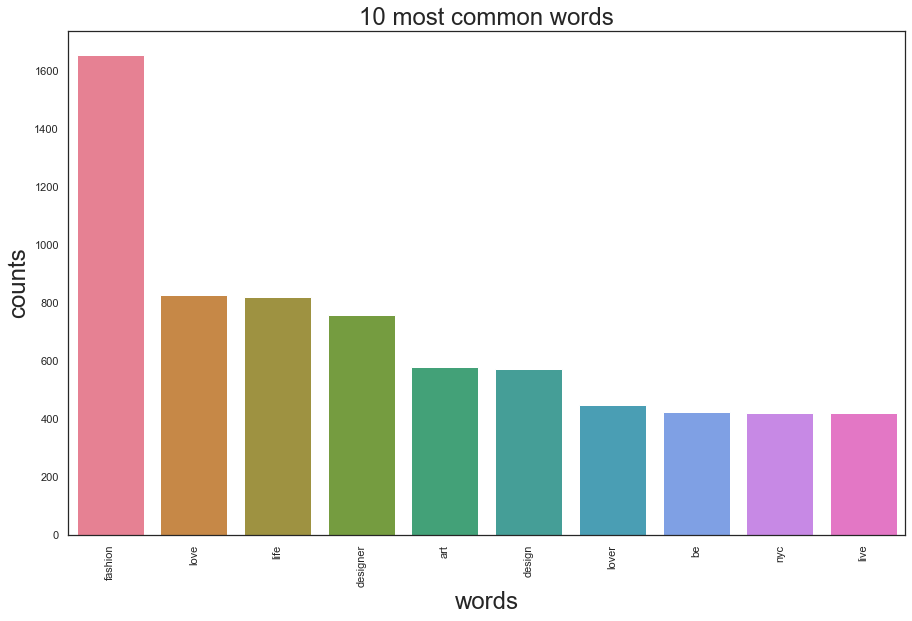

In [5]:
plot_10_most_common_words(tf,vectorizer)

In [6]:
import pickle

# pickle vectorizer
count_vectorizer_path = 'models/count_vectorizer.sav'
pickle.dump(vectorizer, open(count_vectorizer_path, 'wb'))

# GridSearch the best model

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import LatentDirichletAllocation

import multiprocessing
import sklearn.utils

random_state = 1234

In [68]:
cpu = multiprocessing.cpu_count()-1

In [69]:
# Define Search Param
search_params = {'n_components': [3,5,10,15,20,25,30,35,40,45,50,75,100], 'learning_decay': [.6, .7, .9]}

with sklearn.utils.parallel_backend('threading', n_jobs=3):
    # Init the Model
    lda = LatentDirichletAllocation(learning_method = 'online', n_jobs=cpu, evaluate_every = -1, random_state=1234) # random state for reproducibility
    # Init Grid Search Class
    grid_model = GridSearchCV(lda, param_grid=search_params, verbose=4)


    # Do the Grid Search
    grid_model.fit(tf)

Fitting 5 folds for each of 39 candidates, totalling 195 fits
[CV] learning_decay=0.6, n_components=3 ..............................[CV] learning_decay=0.6, n_components=3 ..............................[CV] learning_decay=0.6, n_components=3 ..............................




[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.


[CV]  learning_decay=0.6, n_components=3, score=-73926.472, total= 1.7min
[CV] learning_decay=0.6, n_components=3 ..............................
[CV]  learning_decay=0.6, n_components=3, score=-77310.052, total= 1.7min
[CV] learning_decay=0.6, n_components=3 ..............................
[CV]  learning_decay=0.6, n_components=3, score=-75062.897, total= 1.8min
[CV] learning_decay=0.6, n_components=5 ..............................
[CV]  learning_decay=0.6, n_components=3, score=-78047.628, total= 1.7min
[CV] learning_decay=0.6, n_components=5 ..............................
[CV]  learning_decay=0.6, n_components=3, score=-80177.936, total= 1.6min
[CV] learning_decay=0.6, n_components=5 ..............................
[CV]  learning_decay=0.6, n_components=5, score=-76443.824, total= 1.6min
[CV] learning_decay=0.6, n_components=5 ..............................
[CV]  learning_decay=0.6, n_components=5, score=-79636.420, total= 1.4min[CV]  learning_decay=0.6, n_components=5, score=-79095.74

[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed: 10.3min


[CV]  learning_decay=0.6, n_components=15, score=-84069.628, total= 1.3min
[CV] learning_decay=0.6, n_components=20 .............................
[CV]  learning_decay=0.6, n_components=20, score=-81673.402, total= 1.4min
[CV] learning_decay=0.6, n_components=20 .............................
[CV]  learning_decay=0.6, n_components=20, score=-84498.414, total= 1.3min
[CV] learning_decay=0.6, n_components=20 .............................
[CV]  learning_decay=0.6, n_components=20, score=-81930.535, total= 1.4min
[CV] learning_decay=0.6, n_components=25 .............................
[CV]  learning_decay=0.6, n_components=20, score=-85207.998, total= 1.3min
[CV] learning_decay=0.6, n_components=25 .............................
[CV]  learning_decay=0.6, n_components=20, score=-87340.695, total= 1.3min
[CV] learning_decay=0.6, n_components=25 .............................
[CV]  learning_decay=0.6, n_components=25, score=-82606.553, total= 1.4min
[CV] learning_decay=0.6, n_components=25 ........

[CV]  learning_decay=0.7, n_components=10, score=-79452.755, total= 1.4min
[CV] learning_decay=0.7, n_components=10 .............................
[CV]  learning_decay=0.7, n_components=10, score=-81845.648, total= 1.4min
[CV] learning_decay=0.7, n_components=15 .............................
[CV]  learning_decay=0.7, n_components=10, score=-82506.970, total= 1.4min
[CV] learning_decay=0.7, n_components=15 .............................
[CV]  learning_decay=0.7, n_components=10, score=-84959.141, total= 1.4min
[CV] learning_decay=0.7, n_components=15 .............................
[CV]  learning_decay=0.7, n_components=15, score=-80429.979, total= 1.4min
[CV] learning_decay=0.7, n_components=15 .............................
[CV]  learning_decay=0.7, n_components=15, score=-80907.778, total= 1.4min
[CV] learning_decay=0.7, n_components=15 .............................
[CV]  learning_decay=0.7, n_components=15, score=-83358.381, total= 1.3min
[CV] learning_decay=0.7, n_components=20 ........

[Parallel(n_jobs=3)]: Done  92 tasks      | elapsed: 46.3min


[CV]  learning_decay=0.7, n_components=25, score=-84882.040, total= 1.4min
[CV] learning_decay=0.7, n_components=30 .............................
[CV]  learning_decay=0.7, n_components=25, score=-85687.028, total= 1.4min
[CV] learning_decay=0.7, n_components=30 .............................
[CV]  learning_decay=0.7, n_components=25, score=-88030.525, total= 1.4min
[CV] learning_decay=0.7, n_components=30 .............................
[CV]  learning_decay=0.7, n_components=30, score=-82838.384, total= 1.4min
[CV] learning_decay=0.7, n_components=30 .............................
[CV]  learning_decay=0.7, n_components=30, score=-82977.091, total= 1.4min
[CV] learning_decay=0.7, n_components=30 .............................
[CV]  learning_decay=0.7, n_components=30, score=-85492.556, total= 1.4min
[CV] learning_decay=0.7, n_components=35 .............................
[CV]  learning_decay=0.7, n_components=30, score=-86107.450, total= 1.4min
[CV] learning_decay=0.7, n_components=35 ........

[CV]  learning_decay=0.9, n_components=15, score=-86455.233, total= 1.5min
[CV] learning_decay=0.9, n_components=20 .............................
[CV]  learning_decay=0.9, n_components=20, score=-81578.282, total= 1.5min
[CV] learning_decay=0.9, n_components=20 .............................
[CV]  learning_decay=0.9, n_components=20, score=-84456.904, total= 1.5min
[CV] learning_decay=0.9, n_components=20 .............................
[CV]  learning_decay=0.9, n_components=20, score=-81836.671, total= 1.5min
[CV] learning_decay=0.9, n_components=25 .............................
[CV]  learning_decay=0.9, n_components=20, score=-85111.510, total= 1.4min
[CV] learning_decay=0.9, n_components=25 .............................
[CV]  learning_decay=0.9, n_components=20, score=-87364.969, total= 1.5min
[CV] learning_decay=0.9, n_components=25 .............................
[CV]  learning_decay=0.9, n_components=25, score=-82169.871, total= 1.5min
[CV] learning_decay=0.9, n_components=25 ........

[Parallel(n_jobs=3)]: Done 195 out of 195 | elapsed: 99.9min finished


In [70]:
# Best Model
best_lda_model = grid_model.best_estimator_

# Model Parameters
print("Best Model's Params: ", grid_model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", grid_model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(tf))

Best Model's Params:  {'learning_decay': 0.7, 'n_components': 3}
Best Log Likelihood Score:  -76809.17320893012
Model Perplexity:  838.6528356000089


In [71]:
# pickle best lda model
filename = './models/best_lda_model.sav'
pickle.dump(best_lda_model, open(filename, 'wb'))

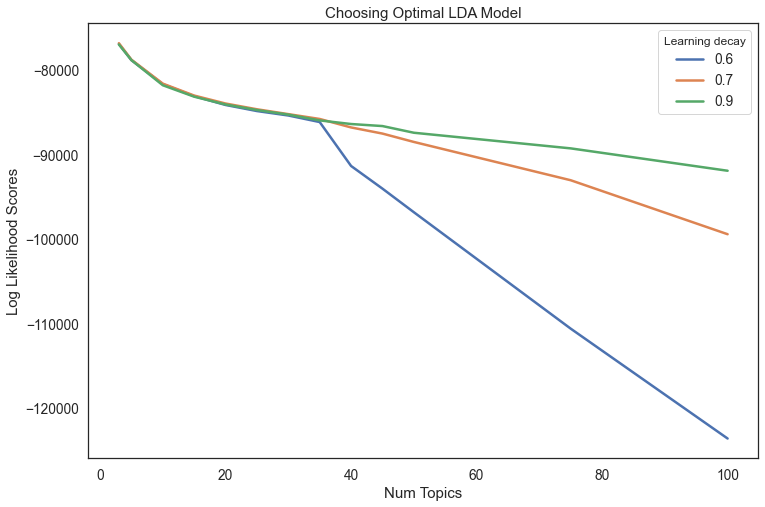

In [74]:
# Get Log Likelyhoods from Grid Search Output
n_topics = [3,5,10,15,20,25,30,35,40,45,50,75,100]

log_likelihoods_6 = [round(grid_model.cv_results_['mean_test_score'][i]) for i,gscore in enumerate(grid_model.cv_results_['params']) if gscore['learning_decay'] == 0.6]
log_likelihoods_7 = [round(grid_model.cv_results_['mean_test_score'][i]) for i,gscore in enumerate(grid_model.cv_results_['params']) if gscore['learning_decay'] == 0.7]
log_likelihoods_9 = [round(grid_model.cv_results_['mean_test_score'][i]) for i,gscore in enumerate(grid_model.cv_results_['params']) if gscore['learning_decay'] == 0.9]

# Show graph
plt.figure(figsize=(12, 8))
plt.plot(n_topics, log_likelihoods_6, label='0.6')
plt.plot(n_topics, log_likelihoods_7, label='0.7')
plt.plot(n_topics, log_likelihoods_9, label='0.9')
plt.title("Choosing Optimal LDA Model")
plt.xlabel("Num Topics")
plt.ylabel("Log Likelihood Scores")
plt.legend(title='Learning decay', loc='best')
plt.savefig('optimal_LDA_model.png')
plt.show()

## Fit LDA model
We start by trying with a model with 5 topics.
- `n_components`: number of topics = 3
- `learning_decay`: which controls the learning rate = 0.9.

In [6]:
bio = pd.read_csv('bio_lemmatized.csv').dropna()
bio

,Unnamed: 0,user,biography,clean_bio,text_rare,lemmatized
0,0,27964737,"b""It's not about winning or loosing... It's ab...",It's not about winning or loosing... It's abou...,winning loosing showing making count😉,win loose show make count
3,3,1652021039,"b""Love drowning,\xf0\x9f\x8e\xa8Movie,\xf0\x9f...","Love drowning,🎨Movie,🎬L'Arc〜en〜Ciel,Rock,🎸okin...",love drowning🎨movie🎬larc〜en〜cielrock🎸okinawa🌺 ...,love drowning 🎨movie 🎬l' arc〜en〜ciel rock 🎸oki...
4,4,14326955008,b'\xf0\x9f\x8c\xbb\nHakuna\xe2\x80\xa2Matata| ...,🌻\nHakuna•Matata| Wander•lust| Randomlang\n @l...,🌻 hakuna matata wander lust randomlang laineca...,hakuna•matata wander•lust randomlang @lainecar...
5,5,10640548799,"b'""Worked so hard forgot how to vacation""\nLik...",Worked so hard forgot how to vacation\nLike[Ma...,worked hard forgot vacation likemathenghistory...,work so hard forget how vacation math&eng&hist...
6,6,6719539649,b'Msc. Biotechnology',Msc. Biotechnology,msc biotechnology,msc. biotechnology
...,...,...,...,...,...,...
19772,19772,246853692,b'A mirage',A mirage,mirage,mirage
19774,19774,21796579204,b'JUSTICE FOR GEORGE FLOYD\nJUSTICE FOR CHRIST...,JUSTICE FOR GEORGE FLOYD\nJUSTICE FOR CHRISTOP...,justice george floyd justice christopher deand...,justice george floyd justice christopher deand...
19775,19775,1070379592,b'technical writer for call of duty | Infinity...,technical writer for call of duty | Infinity W...,technical writer call duty infinity ward atvi,technical writer call duty infinity ward atvi
19776,19776,514233189,b'Fashion stylist | London based | Belfast | P...,Fashion stylist | London based | Belfast | Par...,fashion stylist london based belfast paris whe...,fashion stylist london base belfast paris wher...


In [7]:
import pickle
from sklearn.feature_extraction.text import CountVectorizer

# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=10, lowercase=True)

# apply transformation
tf = vectorizer.fit_transform(bio['lemmatized']) #.toarray()

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()

tf_feature_names[:-1]

['1st',
 '21',
 '22',
 '2nd',
 '90',
 'academy',
 'acc',
 'accept',
 'accessory',
 'account',
 'act',
 'actor',
 'actress',
 'actually',
 'ad',
 'add',
 'addict',
 'addicted',
 'adore',
 'adventure',
 'advisor',
 'advocate',
 'aesthetic',
 'af',
 'africa',
 'again',
 'age',
 'agency',
 'agent',
 'air',
 'aires',
 'al',
 'alive',
 'all',
 'allah',
 'allow',
 'almaty',
 'alone',
 'also',
 'alum',
 'alumna',
 'alumnus',
 'always',
 'am',
 'amante',
 'amateur',
 'amazing',
 'ambassador',
 'american',
 'amo',
 'amor',
 'amsterdam',
 'and',
 'angel',
 'angeles',
 'animal',
 'anime',
 'anti',
 'apparel',
 'appointment',
 'appreciate',
 'aquarius',
 'architect',
 'architecture',
 'area',
 'argentina',
 'army',
 'around',
 'art',
 'arte',
 'artist',
 'artistic',
 'ary',
 'as',
 'asian',
 'ask',
 'aspire',
 'ass',
 'assistant',
 'at',
 'atelier',
 'athens',
 'atl',
 'atlanta',
 'attitude',
 'au',
 'august',
 'austin',
 'australia',
 'austria',
 'author',
 'available',
 'away',
 'az',
 'ba',
 'ba

In [8]:
from sklearn.decomposition import LatentDirichletAllocation

number_of_topics = 3
learning_decay = 0.9
random_state = 1234

model = LatentDirichletAllocation(n_components=number_of_topics,n_jobs = -1, evaluate_every = -1, 
                                  random_state=random_state, learning_decay=learning_decay) # random state for reproducibility

In [9]:
lda_output = model.fit_transform(tf)

### Diagnose model performance with perplexity and log-likelihood

A model with higher log-likelihood and lower perplexity (exp(-1. * log-likelihood per word)) is considered to be good.

In [10]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", model.score(tf))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", model.perplexity(tf))

# See model parameters
print(model.get_params())

Log Likelihood:  -356625.03561727103
Perplexity:  773.8225544010337
{'batch_size': 128, 'doc_topic_prior': None, 'evaluate_every': -1, 'learning_decay': 0.9, 'learning_method': 'batch', 'learning_offset': 10.0, 'max_doc_update_iter': 100, 'max_iter': 10, 'mean_change_tol': 0.001, 'n_components': 3, 'n_jobs': -1, 'perp_tol': 0.1, 'random_state': 1234, 'topic_word_prior': None, 'total_samples': 1000000.0, 'verbose': 0}


In [12]:
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

In [15]:
print("Topics found via LDA:")
number_of_words = 10
print_topics(model, vectorizer, number_of_words)

Topics found via LDA:

Topic #0:
love live lover make new life do mom be go

Topic #1:
fashion designer art design nyc stylist artist have creative student

Topic #2:
life travel fashion girl founder be style dream world music


In [14]:
from pyLDAvis import gensim as ldavis_gensim
from pyLDAvis import sklearn as sklearn_lda
import pickle 
import pyLDAvis
import os 

LDAvis_prepared = sklearn_lda.prepare(model, tf, vectorizer)

pyLDAvis.display(LDAvis_prepared)

We can save the model so not to have to generate it again

In [43]:
LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(number_of_topics))
with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

In [44]:
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath,'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(number_of_topics) +'.html')

We look at the probabilities to belong to each topic for each document and add them to the dataframe.

In [17]:
lda_output[0:10] #probability distribution of each bio over the topics

array([[0.6508312 , 0.06726606, 0.28190274],
       [0.91381686, 0.0417127 , 0.04447044],
       [0.09485762, 0.08340697, 0.82173541],
       [0.24748163, 0.41269582, 0.33982255],
       [0.33333333, 0.33333333, 0.33333333],
       [0.3314523 , 0.11119568, 0.55735203],
       [0.77768785, 0.11115537, 0.11115678],
       [0.1111307 , 0.76944672, 0.11942258],
       [0.33333333, 0.33333333, 0.33333333],
       [0.51187133, 0.13075556, 0.35737311]])

In [20]:
bio['topic_probability'] = lda_output.tolist()

In [21]:
bio.head()

,Unnamed: 0,user,biography,clean_bio,text_rare,lemmatized,topic_probability
0,0,27964737,"b""It's not about winning or loosing... It's ab...",It's not about winning or loosing... It's abou...,winning loosing showing making count😉,win loose show make count,"[0.6508312020331314, 0.06726605540593593, 0.28..."
3,3,1652021039,"b""Love drowning,\xf0\x9f\x8e\xa8Movie,\xf0\x9f...","Love drowning,🎨Movie,🎬L'Arc〜en〜Ciel,Rock,🎸okin...",love drowning🎨movie🎬larc〜en〜cielrock🎸okinawa🌺 ...,love drowning 🎨movie 🎬l' arc〜en〜ciel rock 🎸oki...,"[0.9138168619849883, 0.04171269978465629, 0.04..."
4,4,14326955008,b'\xf0\x9f\x8c\xbb\nHakuna\xe2\x80\xa2Matata| ...,🌻\nHakuna•Matata| Wander•lust| Randomlang\n @l...,🌻 hakuna matata wander lust randomlang laineca...,hakuna•matata wander•lust randomlang @lainecar...,"[0.09485762444851177, 0.08340696535892621, 0.8..."
5,5,10640548799,"b'""Worked so hard forgot how to vacation""\nLik...",Worked so hard forgot how to vacation\nLike[Ma...,worked hard forgot vacation likemathenghistory...,work so hard forget how vacation math&eng&hist...,"[0.24748163031124412, 0.412695819220754, 0.339..."
6,6,6719539649,b'Msc. Biotechnology',Msc. Biotechnology,msc biotechnology,msc. biotechnology,"[0.3333333333333333, 0.3333333333333333, 0.333..."


We store the most probable topic for each bio in a column.

In [27]:
bio['topic'] = bio['topic_probability'].apply(lambda x : np.array(x).argmax())

In [29]:
bio.head()

,Unnamed: 0,user,biography,clean_bio,text_rare,lemmatized,topic_probability,topic
0,0,27964737,"b""It's not about winning or loosing... It's ab...",It's not about winning or loosing... It's abou...,winning loosing showing making count😉,win loose show make count,"[0.6508312020331314, 0.06726605540593593, 0.28...",0
3,3,1652021039,"b""Love drowning,\xf0\x9f\x8e\xa8Movie,\xf0\x9f...","Love drowning,🎨Movie,🎬L'Arc〜en〜Ciel,Rock,🎸okin...",love drowning🎨movie🎬larc〜en〜cielrock🎸okinawa🌺 ...,love drowning 🎨movie 🎬l' arc〜en〜ciel rock 🎸oki...,"[0.9138168619849883, 0.04171269978465629, 0.04...",0
4,4,14326955008,b'\xf0\x9f\x8c\xbb\nHakuna\xe2\x80\xa2Matata| ...,🌻\nHakuna•Matata| Wander•lust| Randomlang\n @l...,🌻 hakuna matata wander lust randomlang laineca...,hakuna•matata wander•lust randomlang @lainecar...,"[0.09485762444851177, 0.08340696535892621, 0.8...",2
5,5,10640548799,"b'""Worked so hard forgot how to vacation""\nLik...",Worked so hard forgot how to vacation\nLike[Ma...,worked hard forgot vacation likemathenghistory...,work so hard forget how vacation math&eng&hist...,"[0.24748163031124412, 0.412695819220754, 0.339...",1
6,6,6719539649,b'Msc. Biotechnology',Msc. Biotechnology,msc biotechnology,msc. biotechnology,"[0.3333333333333333, 0.3333333333333333, 0.333...",0


In [30]:
bio.to_csv('bio_with_topic.csv')